#### 학습목표
- 시각화 패키지 matplotlib
- 서브 패키지   pyplot
- 고급 시각화   seaborn
- 지도 시각화   folium
- 현업(BI)      Tableau

In [163]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [164]:
# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


In [165]:
# 워닝 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

In [166]:
# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

Plot 유형
- line : 데이터가 시간, 순서 등에 따라서 어떻게 변화하는지를 보여주는 시각화
- area
- surface
- bar
- hist
- box etc...

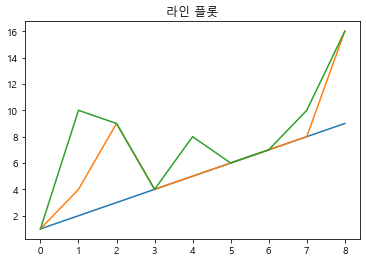

<function matplotlib.pyplot.close(fig=None)>

In [167]:
# 그림판 준비
plt.figure()
plt.title('라인 플롯')

plt.plot([1,2,3,4,5,6,7,8,9])
plt.plot([1,4,9,4,5,6,7,8,16])
plt.plot([1,10,9,4,8,6,7,10,16])

plt.show()
plt.close

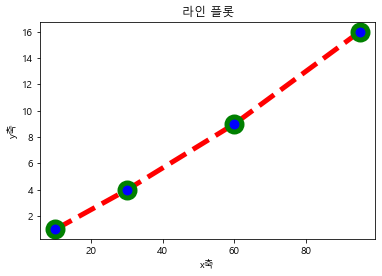

<function matplotlib.pyplot.close(fig=None)>

In [168]:
plt.figure()
plt.title('라인 플롯')

plt.plot([10, 30, 60, 95], [1,4,9,16],
        c = 'red',
        lw = 5,
        ls = '--',
        marker = 'o',
        ms = 15,
        mec = 'g',
        mew = 5,
        mfc = 'blue')

plt.xlabel('x축')
plt.ylabel('y축')

plt.show()
plt.close

- 시도별 전출입 인구수.xlsx 이용한 라인플롯

In [169]:
tmp_frm = pd.read_excel('./data/visualization_data/시도별 전출입 인구수.xlsx' ,
                       header = 0)
tmp_frm.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536.0,4210164.0,3687938.0,4860418.0,5297969.0,9011440.0,6773250.0,7397623.0,...,8808256.0,8487275.0,8226594.0,8127195.0,7506691.0,7411784.0,7629098.0,7755286.0,7378430.0,7154226.0
2,NaN,서울특별시,1742813.0,1671705.0,1349333.0,1831858.0,2050392.0,3396662.0,2756510.0,2893403.0,...,2025358.0,1873188.0,1733015.0,1721748.0,1555281.0,1520090.0,1573594.0,1589431.0,1515602.0,1472937.0
3,NaN,부산광역시,448577.0,389797.0,362202.0,482061.0,680984.0,805979.0,724664.0,785117.0,...,514502.0,519310.0,519334.0,508043.0,461042.0,478451.0,485710.0,507031.0,459015.0,439073.0
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938.0,398626.0,370817.0,370563.0,348642.0,351873.0,350213.0,351424.0,328228.0,321182.0


In [170]:
tmp_frm = tmp_frm.fillna(method = 'ffill')
tmp_frm.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536.0,4210164.0,3687938.0,4860418.0,5297969.0,9011440.0,6773250.0,7397623.0,...,8808256.0,8487275.0,8226594.0,8127195.0,7506691.0,7411784.0,7629098.0,7755286.0,7378430.0,7154226.0
2,전국,서울특별시,1742813.0,1671705.0,1349333.0,1831858.0,2050392.0,3396662.0,2756510.0,2893403.0,...,2025358.0,1873188.0,1733015.0,1721748.0,1555281.0,1520090.0,1573594.0,1589431.0,1515602.0,1472937.0
3,전국,부산광역시,448577.0,389797.0,362202.0,482061.0,680984.0,805979.0,724664.0,785117.0,...,514502.0,519310.0,519334.0,508043.0,461042.0,478451.0,485710.0,507031.0,459015.0,439073.0
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938.0,398626.0,370817.0,370563.0,348642.0,351873.0,350213.0,351424.0,328228.0,321182.0


In [171]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 서브셋 만들기
seoul_frm = tmp_frm[(tmp_frm['전출지별'] == '서울특별시') & (tmp_frm['전입지별'] != '서울특별시')]

In [172]:
seoul_frm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 19 to 36
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    17 non-null     object
 1   전입지별    17 non-null     object
 2   1970    17 non-null     object
 3   1971    17 non-null     object
 4   1972    17 non-null     object
 5   1973    17 non-null     object
 6   1974    17 non-null     object
 7   1975    17 non-null     object
 8   1976    17 non-null     object
 9   1977    17 non-null     object
 10  1978    17 non-null     object
 11  1979    17 non-null     object
 12  1980    17 non-null     object
 13  1981    17 non-null     object
 14  1982    17 non-null     object
 15  1983    17 non-null     object
 16  1984    17 non-null     object
 17  1985    17 non-null     object
 18  1986    17 non-null     object
 19  1987    17 non-null     object
 20  1988    17 non-null     object
 21  1989    17 non-null     object
 22  1990    17 non-null     obj

In [173]:
# 전출지별 컬럼 삭제 - drop
seoul_frm.drop('전출지별', inplace = True, axis = 1)

In [174]:
# 전입지별 -> 전입지 변경
seoul_frm.rename(columns = {'전입지별': '전입지'},
                inplace = True)

In [175]:
seoul_frm.head()

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,3028911.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928.0,1620640.0,1661425.0,1726687.0,1655859.0,1571423.0
21,부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,...,17353.0,17738.0,17418.0,18816.0,16135.0,16153.0,17320.0,17009.0,15062.0,14484.0
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720.0,10464.0,10277.0,10397.0,10135.0,10631.0,10062.0,10191.0,9623.0,8891.0
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493.0,45392.0,46082.0,51641.0,49640.0,47424.0,43212.0,44915.0,43745.0,40485.0
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846.0,11725.0,11095.0,10587.0,10154.0,9129.0,9759.0,9216.0,8354.0,7932.0


In [176]:
seoul_frm.set_index('전입지', inplace=True)
seoul_frm

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,3028911.0,2441242.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928.0,1620640.0,1661425.0,1726687.0,1655859.0,1571423.0
부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,17353.0,17738.0,17418.0,18816.0,16135.0,16153.0,17320.0,17009.0,15062.0,14484.0
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720.0,10464.0,10277.0,10397.0,10135.0,10631.0,10062.0,10191.0,9623.0,8891.0
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493.0,45392.0,46082.0,51641.0,49640.0,47424.0,43212.0,44915.0,43745.0,40485.0
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846.0,11725.0,11095.0,10587.0,10154.0,9129.0,9759.0,9216.0,8354.0,7932.0
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515.0,13632.0,13819.0,13900.0,14080.0,13440.0,13403.0,13453.0,12619.0,11815.0
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057.0,4845.0,4742.0,5188.0,5691.0,5542.0,6047.0,5950.0,5102.0,4260.0
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998.0,2851.0,6481.0,7550.0,5943.0,5813.0
경기도,130149.0,150313.0,93333.0,143234.0,149045.0,253705.0,202276.0,207722.0,237684.0,278411.0,...,412408.0,398282.0,410735.0,373771.0,354135.0,340801.0,332785.0,359337.0,370760.0,342433.0


In [177]:
# 경기도 전입인구 데이터만 추출
data_series = seoul_frm.loc['경기도']

print('type - ', type(data_series))
print()
print('index - ', data_series.index)
print()
print('values - ', data_series.values)
print('values type - ', type(data_series.values))

type -  <class 'pandas.core.series.Series'>

index -  Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

values -  [130149.0 150313.0 93333.0 143234.0 149045.0 253705.0 202276.0 207722.0
 237684.0 278411.0 297539.0 252073.0 320174.0 400875.0 352238.0 390265.0
 412535.0 405220.0 415174.0 412933.0 473889.0 384714.0 428344.0 502584.0
 542204.0 599411.0 520566.0 495454.0 407050.0 471841.0 435573.0 499575.0
 516765.0 457656.0 400206.0 414621.0 449632.0 431637.0 412408.0 398282.0
 410735.0 373771.0 354135.0 340801.0 332785.0 359337.0 370760.0 342433.0]
values type -  <class 'numpy.ndarray'>


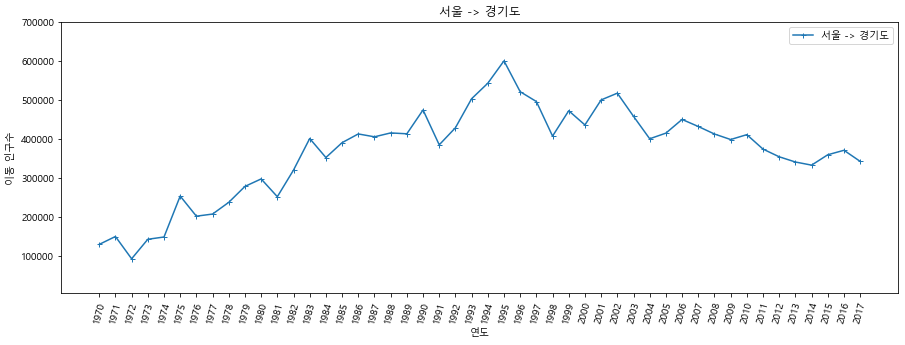

<function matplotlib.pyplot.close(fig=None)>

In [178]:
# 경기도로 이동한 인구 데이터를 이용한 시각화
plt.figure(figsize = (15, 5))
plt.title('서울 -> 경기도')

plt.plot(data_series.index, data_series.values, 
         marker = '+',
         ms = 5)

plt.xlabel('연도')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울 -> 경기도'], loc = 'best')
plt.ylim(5000, 700000)
plt.xticks(rotation = 75)

plt.show()
plt.close

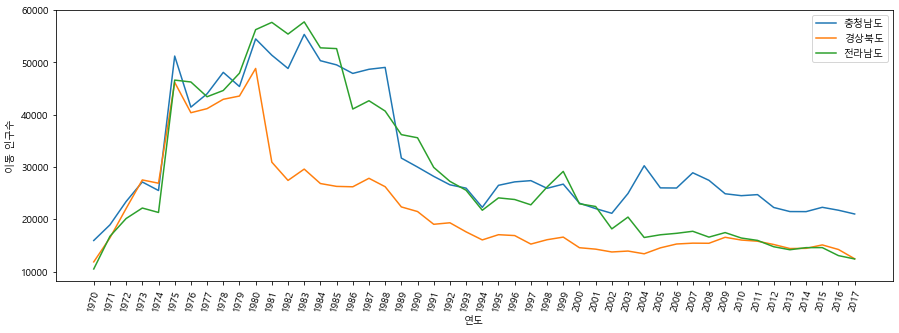

<function matplotlib.pyplot.close(fig=None)>

In [179]:
# 충남, 경북, 전남으로 이동한 인구 데이터를 이용한 시각화
plt.figure(figsize = (15, 5))

plt.plot(seoul_frm.columns.values, seoul_frm.loc['충청남도'].values, label = '충청남도')
plt.plot(seoul_frm.columns.values, seoul_frm.loc['경상북도'].values, label = '경상북도')
plt.plot(seoul_frm.columns.values, seoul_frm.loc['전라남도'].values, label = '전라남도')

plt.xlabel('연도')
plt.ylabel('이동 인구수')

plt.xticks(rotation = 75)
plt.legend(loc = 'best')

plt.show()
plt.close

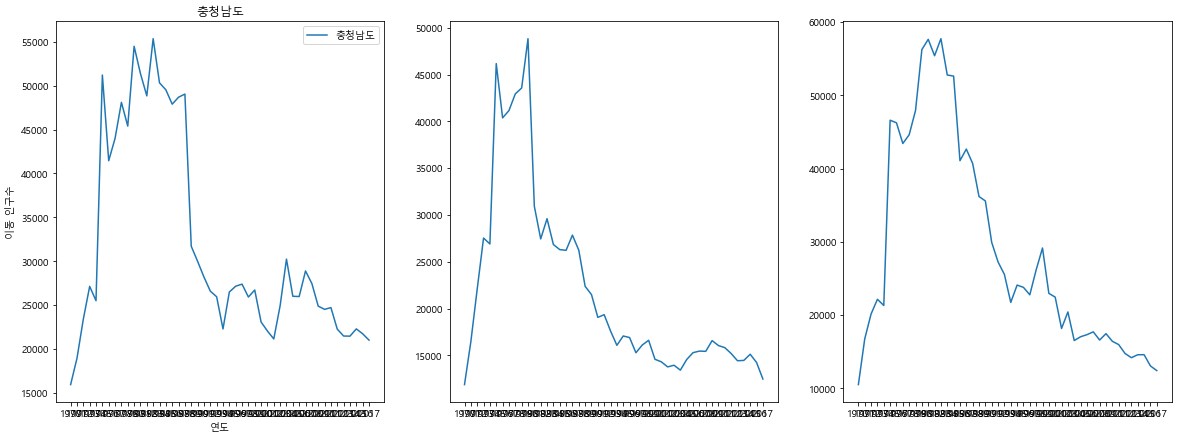

In [181]:
# subplot

fig = plt.figure(figsize = (20, 7))

area01 = fig.add_subplot(1,3,1)
area01.plot(seoul_frm.columns.values, seoul_frm.loc['충청남도'].values, label = '충청남도')
area01.set_title('충청남도')
area01.set_xlabel('연도')
area01.set_ylabel('이동 인구수')
area01.set_xticklabels(labels = seoul_frm.columns.values)
area01.legend(loc='best')

area02 = fig.add_subplot(1,3,2)
area03 = fig.add_subplot(1,3,3)

area02.plot(seoul_frm.columns.values, seoul_frm.loc['경상북도'].values, label = '경상북도')
area03.plot(seoul_frm.columns.values, seoul_frm.loc['전라남도'].values, label = '전라남도')

plt.show()
plt.close()

In [68]:
import seaborn as sns

iris_frm = sns.load_dataset('iris')
titanic_frm = sns.load_dataset('titanic')

- barplot : x축이 범주형

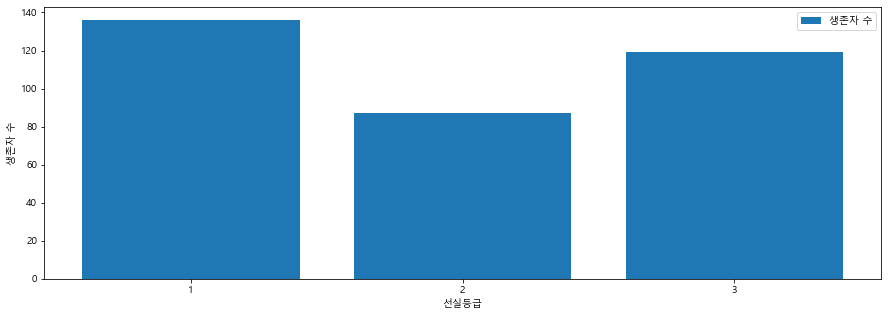

In [86]:
# 타이타닉 선실별 생존자 합 - groupby
titanic_frm.groupby('pclass').sum()['survived']

plt.figure(figsize = (15,5))
plt.bar(titanic_frm.groupby('pclass').sum()['survived'].index,
        titanic_frm.groupby('pclass').sum()['survived'].values,
        label = '생존자 수')

plt.legend(loc='best')
plt.xlabel('선실등급')
plt.ylabel('생존자 수')
plt.xticks(titanic_frm.groupby('pclass').sum()['survived'].index)

plt.show()
plt.close()

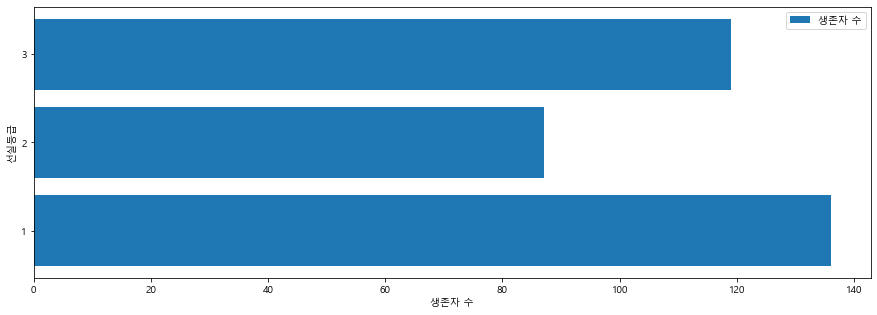

In [89]:
titanic_frm.groupby('pclass').sum()['survived']

plt.figure(figsize = (15,5))
plt.barh(titanic_frm.groupby('pclass').sum()['survived'].index,
        titanic_frm.groupby('pclass').sum()['survived'].values,
        label = '생존자 수')

plt.legend(loc='best')
plt.xlabel('생존자 수')
plt.ylabel('선실등급')
plt.yticks(titanic_frm.groupby('pclass').sum()['survived'].index)

plt.show()
plt.close()

In [130]:
# 서브셋 만들기
# 조건1) 충청남도, 경상북도, 강원도, 전라남도
# 조건2) 2010~2017


subset_frm = seoul_frm.loc[['충청남도','경상북도','강원도','전라남도'],'2010':'2017']
subset_frm

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522.0,24723.0,22269.0,21486.0,21473.0,22299.0,21741.0,21020.0
경상북도,16042.0,15818.0,15191.0,14420.0,14456.0,15113.0,14236.0,12464.0
강원도,22736.0,23624.0,22332.0,20601.0,21173.0,22659.0,21590.0,21016.0
전라남도,16429.0,15974.0,14765.0,14187.0,14591.0,14598.0,13065.0,12426.0


In [131]:
# 연도에 따른 권역별 인구 전입 수 - bar 시각화
t_subset_frm = subset_frm.T
t_subset_frm.index

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], dtype='object')

<Figure size 432x288 with 0 Axes>

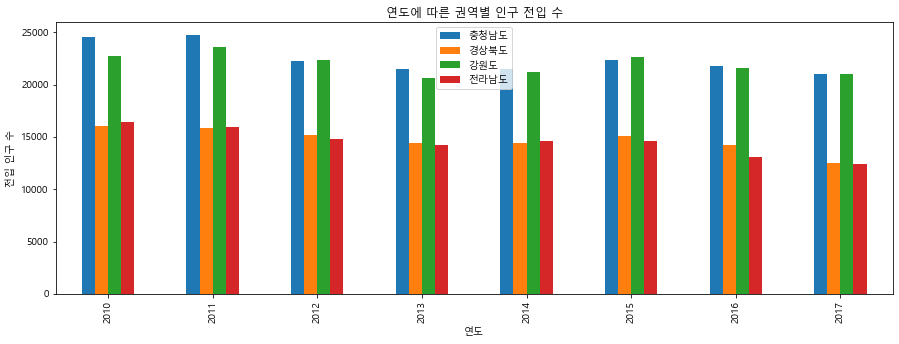

In [132]:


plt.figure()

t_subset_frm.plot(kind = 'bar',
                 figsize = (15,5))
plt.title('연도에 따른 권역별 인구 전입 수')
plt.xlabel('연도')
plt.ylabel('전입 인구 수')

plt.legend(loc='best')
        
plt.show()
plt.close()

In [135]:
# 권역별 합계 추가, 내림차순 정렬
subset_frm['합계'] = subset_frm.sum(axis=1)
subset_frm = subset_frm[['합계']].sort_values('합계', ascending=False)
subset_frm

,합계
전입지,
충청남도,359066.0
강원도,351462.0
경상북도,235480.0
전라남도,232070.0


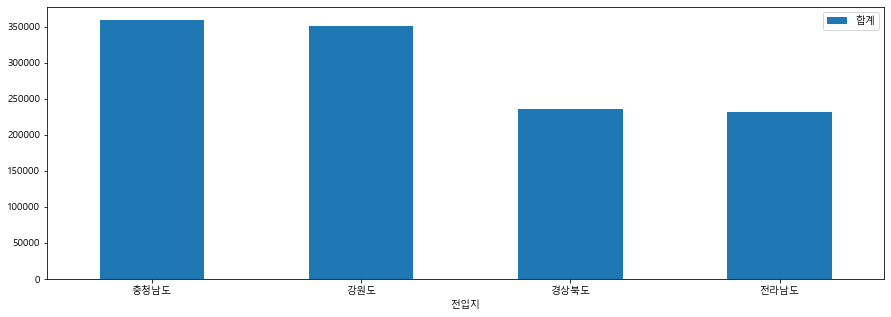

In [136]:
# 권역별 합계가 가장 많은 권역값을 정렬 수평막대그래프로 시각화
subset_frm.plot(kind = 'bar',
               figsize = (15,5))

plt.xticks(rotation = 0)
plt.show()
plt.close()

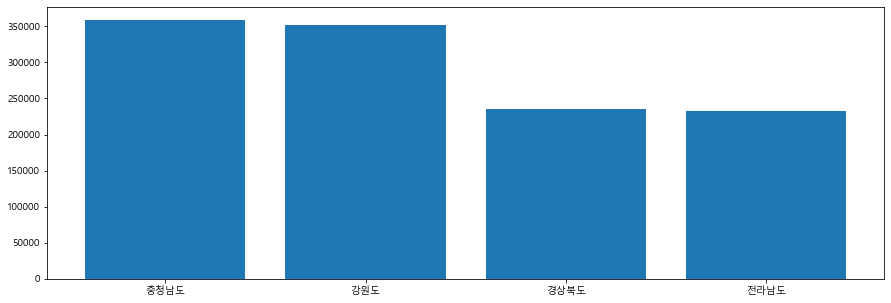

In [138]:
plt.figure(figsize = (15,5))
plt.bar(subset_frm.index,
       subset_frm['합계'].values)

plt.show()
plt.close()

- iris

In [139]:
iris_frm

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [151]:
print('종을 기준으로 그룹화하여 각 그룹의 평균을 구해서 시각화 한다면? - ')
print('조건 rename - sepal_length -> 꽃받침길이 sepal_width -> 꽃받침넓이 petal_length -> 꽃잎길이 petal_width -> 꽃잎넓이')
print('kind - bar')
iris_frm.rename(columns = {'sepal_length':'꽃받침길이',
                           'sepal_width': '꽃받침넓이',
                          'petal_length': '꽃잎길이',
                          'petal_width': '꽃잎넓이',
                          'species' : 'Y'},
                inplace = True)

종을 기준으로 그룹화하여 각 그룹의 평균을 구해서 시각화 한다면? - 
조건 rename - sepal_length -> 꽃받침길이 sepal_width -> 꽃받침넓이 petal_length -> 꽃잎길이 petal_width -> 꽃잎넓이
kind - bar


In [153]:
iris_mean = iris_frm.groupby('Y').mean()
iris_mean

,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이
Y,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<Figure size 432x288 with 0 Axes>

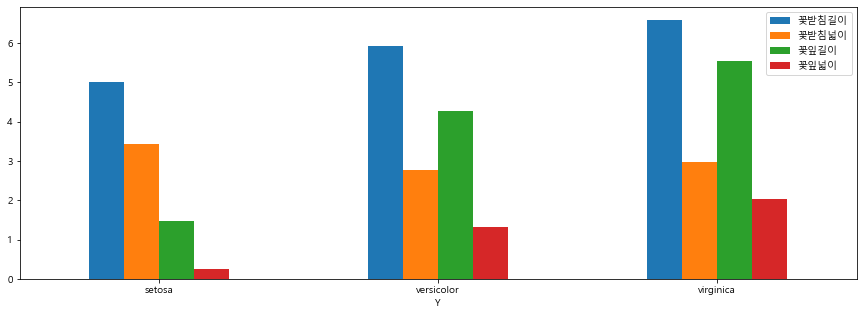

In [154]:
iris_mean.plot(kind = 'bar',
               figsize = (15,5))
plt.xticks(rotation = 0)
plt.legend(loc='best')
        
plt.show()
plt.close()

In [155]:
iris_mean = iris_mean.T
iris_mean

Y,setosa,versicolor,virginica
꽃받침길이,5.006,5.936,6.588
꽃받침넓이,3.428,2.770,2.974
꽃잎길이,1.462,4.260,5.552
꽃잎넓이,0.246,1.326,2.026


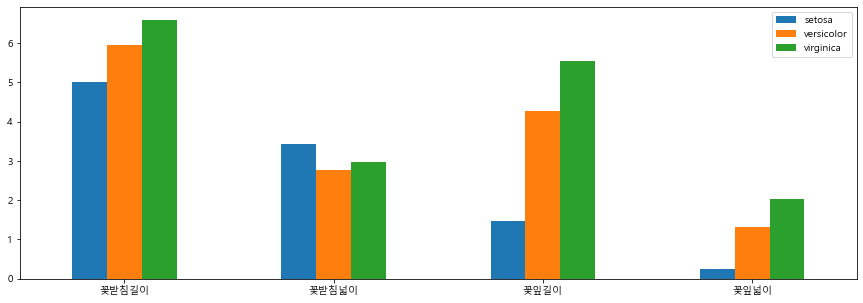

In [156]:
iris_mean.plot(kind = 'bar',
               figsize = (15,5))
plt.xticks(rotation = 0)
plt.legend(loc='best')
        
plt.show()
plt.close()

In [157]:
iris_frm

,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이,Y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

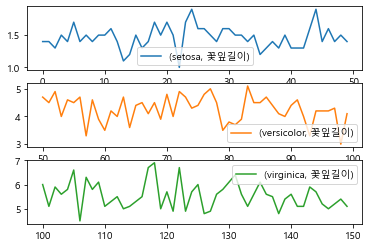

In [158]:
iris_frm[['꽃잎길이', 'Y']].plot(by='Y')

꽃잎길이    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

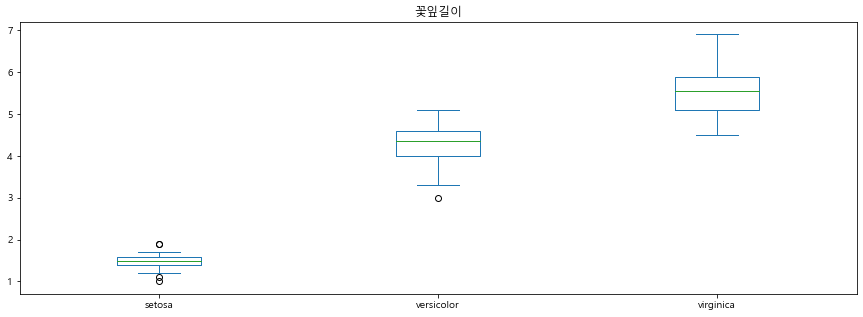

In [160]:
iris_frm[['꽃잎길이', 'Y']].plot(by='Y', kind = 'box', figsize=(15,5))

#### 남북한발전전력량.xlsx

- plot
- bar
- box
- frm.plot, bar, box

In [161]:
tmp_frm = pd.read_excel('./data/visualization_data/남북한발전전력량.xlsx' ,
                       header = 0)
tmp_frm.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [162]:
tmp_frm = tmp_frm.fillna(method = 'ffill')
tmp_frm.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
